### Отбор наиболее важных признаков при помощи метода случайного леса

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from russian_names import russian_names

In [3]:
df_pr = pd.read_csv('../datasets/data_processed.csv')
df_pr.head(10)

,Unnamed: 0,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,0,1,8,0.555556,2,1,13,4,6,10,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1
1,1,1,2,0.111111,11,1,1,3,4,4,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.000000,0
2,2,1,1,0.555556,5,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.000000,1
3,3,1,8,0.222222,15,1,23,27,6,4,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0
4,4,2,12,0.111111,3,1,22,28,10,10,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0
5,5,2,12,0.111111,17,12,22,27,10,8,...,0.192308,0.628193,0.0,0.0,0.217391,0.515152,0.25,0.619231,0.416667,0
6,6,1,1,0.111111,12,1,13,28,8,11,...,0.269231,0.704636,0.0,0.0,0.347826,0.242424,0.40,0.772423,0.000000,0
7,7,1,9,0.444444,11,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.000000,1
8,8,1,1,0.333333,10,1,1,1,10,10,...,0.230769,0.735099,0.0,0.0,0.260870,0.212121,0.30,0.761538,0.000000,0
9,9,1,1,0.111111,10,1,1,14,5,8,...,0.192308,0.603974,0.0,0.0,0.260870,0.424242,0.10,0.726923,0.000000,1


In [4]:
df_pr = df_pr.drop('Unnamed: 0', axis=1)
df_pr

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,1,8,0.555556,2,1,13,4,6,10,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,1
1,1,2,0.111111,11,1,1,3,4,4,1,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0
2,1,1,0.555556,5,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,1
3,1,8,0.222222,15,1,23,27,6,4,1,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0
4,2,12,0.111111,3,1,22,28,10,10,0,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0.666667,15,1,1,1,6,5,0,...,0.192308,0.720530,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0
4420,1,1,0.222222,15,1,1,1,10,10,1,...,0.230769,0.635762,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,1
4421,1,1,0.111111,12,1,22,27,10,10,1,...,0.269231,0.790066,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,1
4422,1,1,0.111111,9,1,22,27,8,5,1,...,0.192308,0.731126,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0


Разделение на 4 выборки: 70%, 15%, 10%, 5%.

In [5]:
X = df_pr.copy()
# Отделить целевую переменную и записать ее в y
X = X.drop('Target', axis=1)
y = df_pr['Target']

In [6]:
# Делим на 80 и 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# От train отделяем 1/8 => train - 70%, val - 10%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

In [8]:
# От test отделяем 1/4 => test - 15%, new - 5%
X_test, X_new, y_test, y_new = train_test_split(X_test, y_test, test_size=0.25, random_state=42, stratify=y_test)

In [9]:
# Проверка
splits = {
    'Обучающая': X_train,
    'Тестовая': X_test,
    'Валидационная': X_val,
    'Новые данные': X_new,
}

# Вывод из словаря для каждого ключа количества строк и подсчет процента от общего количества
for name, split in splits.items():
    n = len(split)
    perc = n / len(X) * 100
    print(f'{name}: {n} строк, {perc:.1f} %')

Обучающая: 3096 строк, 70.0 %
Тестовая: 663 строк, 15.0 %
Валидационная: 443 строк, 10.0 %
Новые данные: 222 строк, 5.0 %


In [10]:
clf = RandomForestClassifier(n_estimators=100)
# Обучение модели
clf.fit(X_train,y_train)
# Вывести отсортированное влияние признаков
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Units 2 approved           0.150183
Units 2 grade              0.135098
Units 1 approved           0.109363
Units 1 grade              0.071553
Tuition fees up to date    0.066440
Age at enrollment          0.052016
Units 2 evaluations        0.042161
Course                     0.040404
Father's occupation        0.035998
Units 1 evaluations        0.034687
Mother's occupation        0.028919
Mother's qualification     0.026269
Father's qualification     0.025266
Units 2 enrolled           0.025208
Application mode           0.025125
Units 1 enrolled           0.022074
Debtor                     0.021877
Application order          0.016104
Scholarship holder         0.013200
Gender                     0.011737
Displaced                  0.009054
Units 1 credited           0.007548
Previous qualification     0.007458
Units 2 credited           0.006969
Units 2 non_eval           0.005916
Units 1 non_eval           0.005371
Marital status             0.004003
dtype: float64

Визуализация важности признаков

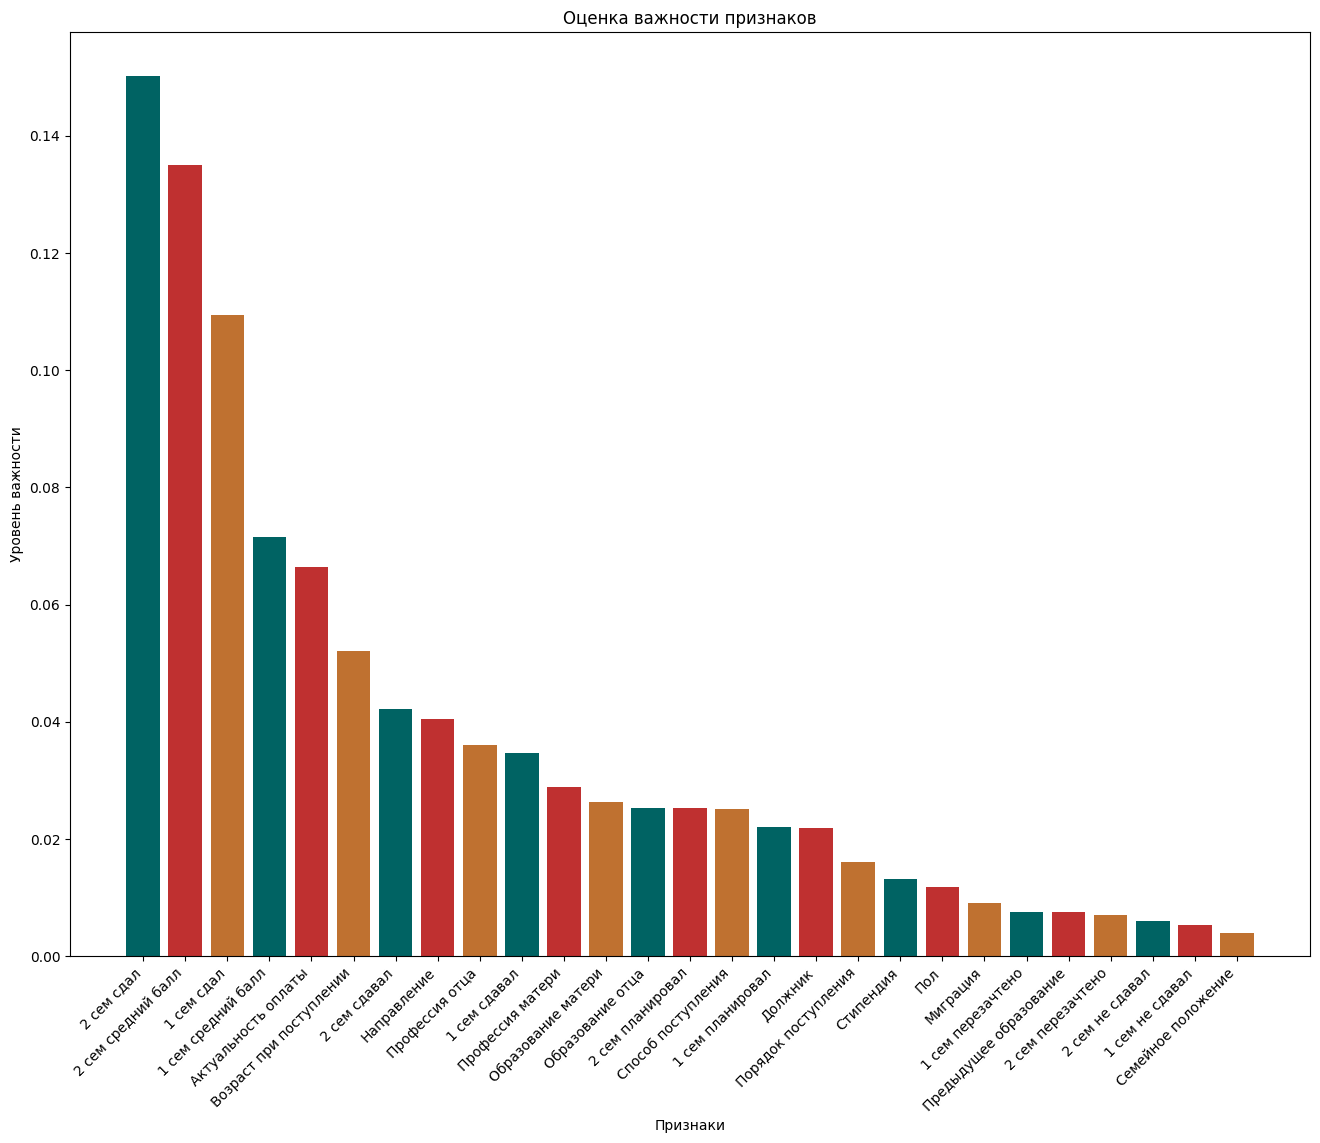

In [11]:
# Создание списков цветовой гаммы и русифицированных имён
color=['#006363', '#BF3030', '#BF7130']
labels = [russian_names[column] for column in feature_imp.index]

plt.figure(figsize=(16,12))
# Столбчатая диаграмма
plt.bar(feature_imp.index, feature_imp, color=color)

plt.title('Оценка важности признаков')
plt.xlabel('Признаки')
plt.ylabel('Уровень важности')
# Развернуть подписи на оси x для читаемости 
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

plt.show()

Удаляем ненужные признаки из всех трех выборок

In [12]:
# Список признаков
list_to_drop = ['Displaced', 'Previous qualification', 'Units 2 credited', 'Units 1 credited',
                'Units 2 non_eval', 'Units 1 non_eval', 'Marital status']

In [13]:
# Удаление из всех выборок
X_train = X_train.drop(columns=list_to_drop)
X_test = X_test.drop(columns=list_to_drop)
X_val = X_val.drop(columns=list_to_drop)
X_new = X_new.drop(columns=list_to_drop)

### Обучение леса деревьев

In [14]:
# Классификатор на 300 деревьев для большей точности
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
# Предсказание меток классов
y_pred = clf.predict(X_val)

# Основные метрики
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       301
           1       0.82      0.63      0.71       142

    accuracy                           0.84       443
   macro avg       0.83      0.78      0.80       443
weighted avg       0.83      0.84      0.83       443



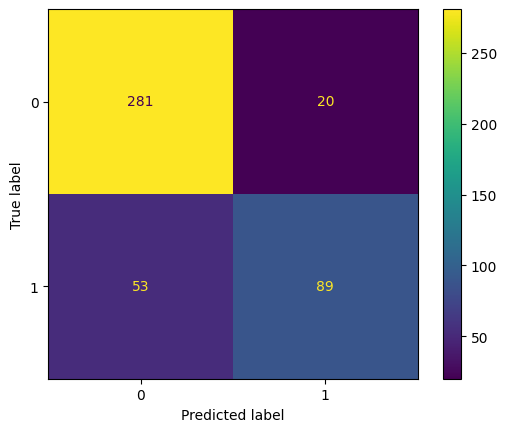

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Матрица ошибок
cm = confusion_matrix(y_val, y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
ax.plot()
plt.show()

### Визуализация распределения целевой переменной  
Плохое предсказание класса 1 связано с дисбалансом классов


<Axes: xlabel='Target'>

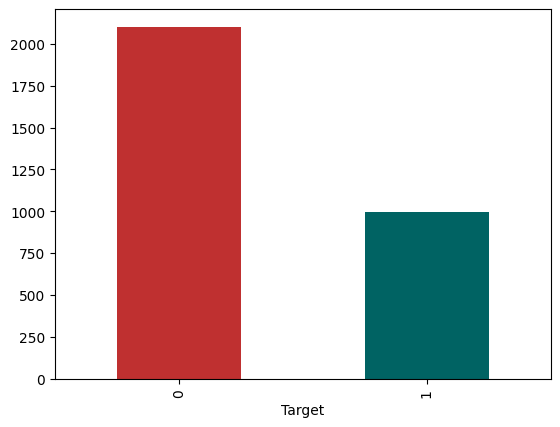

In [25]:
y_train.value_counts().plot(kind='bar', color=['#BF3030', '#006363'], )

### Обучение нейросетей

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers

Масштабирование категориальных признаков для нейросетей

In [16]:
#Колонки для масштабирования
columns = ['Application mode', 'Course', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation"]
# Загрузка нормализатора
scaler = MinMaxScaler()
# Масштабирование
X_train[columns] = scaler.fit_transform(X_train[columns])
X_val[columns] = scaler.fit_transform(X_val[columns])
X_test[columns] = scaler.fit_transform(X_test[columns])
X_new[columns] = scaler.fit_transform(X_new[columns])

In [17]:
# Добавление id студентов
X_new['id_student'] = [f'{i:04d}' for i in range(1, len(X_new)+1)]

In [40]:
# Сохранение новых данных
X_new.to_csv('../datasets/new_data.csv', index=False)

#### Модель 1

In [19]:
# Вариант архитектуры модели бинарной классификации 
model_1 = Sequential([
    # Первый слой: 32 нейрона, функция активации ReLU
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # Dropout для предотвращения переобучения
    Dropout(0.3),
    # Второй слой: 16 нейронов, функция активации ReLU
    Dense(16, activation='relu'),
    # Выходной слой, сигмоидальная функция (вероятность класса 1) 
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model_1.compile(optimizer='adam',
               loss='binary_crossentropy', # ф-ция потерь бинарной классификации
               # метрики: точность+качество разделения классов
               metrics=['accuracy', keras.metrics.AUC(name='auc')]) 

start_time = time.time()
# Обучение: 
history_1 = model_1.fit(X_train, y_train, # обучающие
                        validation_data=(X_val, y_val),# тестовые
                        epochs=40, # количество эпох
                        batch_size=32, # число образцов до смены весов
                        verbose=1) # показать процесс обучения
end_time = time.time()
# Замер времени обучения
print(f'Время обучения: {end_time - start_time:.3f} секунд')


Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.5887 - accuracy: 0.6783 - auc: 0.6769 - val_loss: 0.5168 - val_accuracy: 0.7020 - val_auc: 0.8678
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.7894 - auc: 0.8482 - val_loss: 0.4241 - val_accuracy: 0.8014 - val_auc: 0.8810
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8349 - auc: 0.8689 - val_loss: 0.3980 - val_accuracy: 0.8217 - val_auc: 0.8904
Epoch 4/40
97/97 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8459 - auc: 0.8701 - val_loss: 0.3827 - val_accuracy: 0.8239 - val_auc: 0.8952
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8469 - auc: 0.8818 - val_loss: 0.3741 - val_accuracy: 0.8239 - val_auc: 0.8996
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8475 - auc: 0.8877 - val_loss: 0.3739 - val_acc

Визуализация

In [22]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])


In [23]:
# Функция для вывода графиков
# Принимает объект history и номер модели
def show_metrics(history_name, num):
    plt.figure(figsize=(12,15))
    # Общий заголовок
    plt.suptitle(f'Метрики {num} модели')
    
    plt.subplot(3,1,1) # расположение: 3 строки, 1 столбец, 1 ячейка
    # Вывод линейных графиков для метрик
    plt.plot(history_name.history['accuracy'], color='#BF3030', label='Точность train')
    plt.plot(history_name.history['val_accuracy'], color='#006363', label='Точность val')
    # Заголовок конкретного графика
    plt.title(f'Точность {num} модели')
    # Подписи осей
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    # Сетка (полупрозрачная)
    plt.grid(alpha=0.5)
    # Легенда 
    plt.legend()

    # Аналогично для других метрик
    plt.subplot(3,1,2)
    plt.plot(history_name.history['loss'], color='#BF3030', label='Функция потерь train')
    plt.plot(history_name.history['val_loss'], color='#006363', label='Функция потерь val')
    plt.title(f'Функция потерь {num} модели')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,1,3)
    plt.plot(history_name.history['auc'], color='#BF3030', label='AUC на train')
    plt.plot(history_name.history['val_auc'], color='#006363', label='AUC на val')
    plt.title('AUC')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

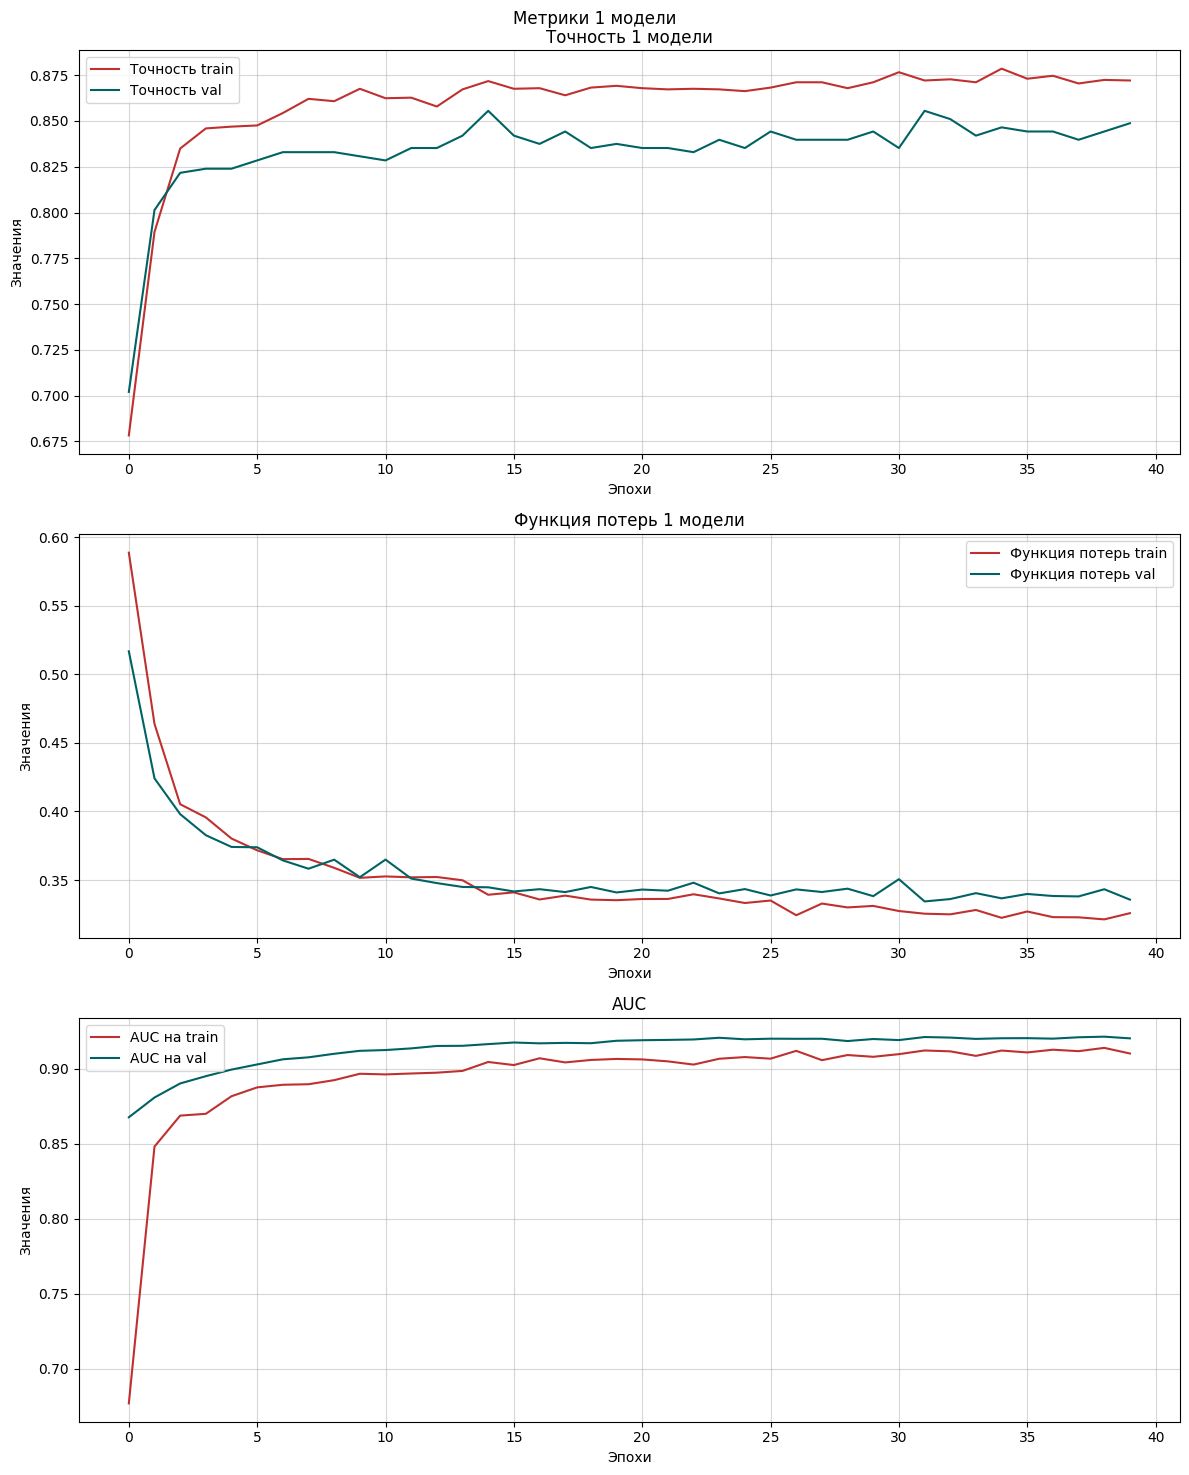

In [24]:
show_metrics(history_1, 1)

#### Модель 2

In [20]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.5693 - accuracy: 0.6893 - auc: 0.7070 - val_loss: 0.4672 - val_accuracy: 0.7743 - val_auc: 0.8629
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.8023 - auc: 0.8436 - val_loss: 0.3981 - val_accuracy: 0.8172 - val_auc: 0.8905
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8330 - auc: 0.8657 - val_loss: 0.3775 - val_accuracy: 0.8330 - val_auc: 0.8991
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8466 - auc: 0.8707 - val_loss: 0.3705 - val_accuracy: 0.8352 - val_auc: 0.9074
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8553 - auc: 0.8840 - val_loss: 0.3598 - val_accuracy: 0.8307 - val_auc: 0.9112
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8553 - auc: 0.8854 - val_loss: 0.3574 - val_acc

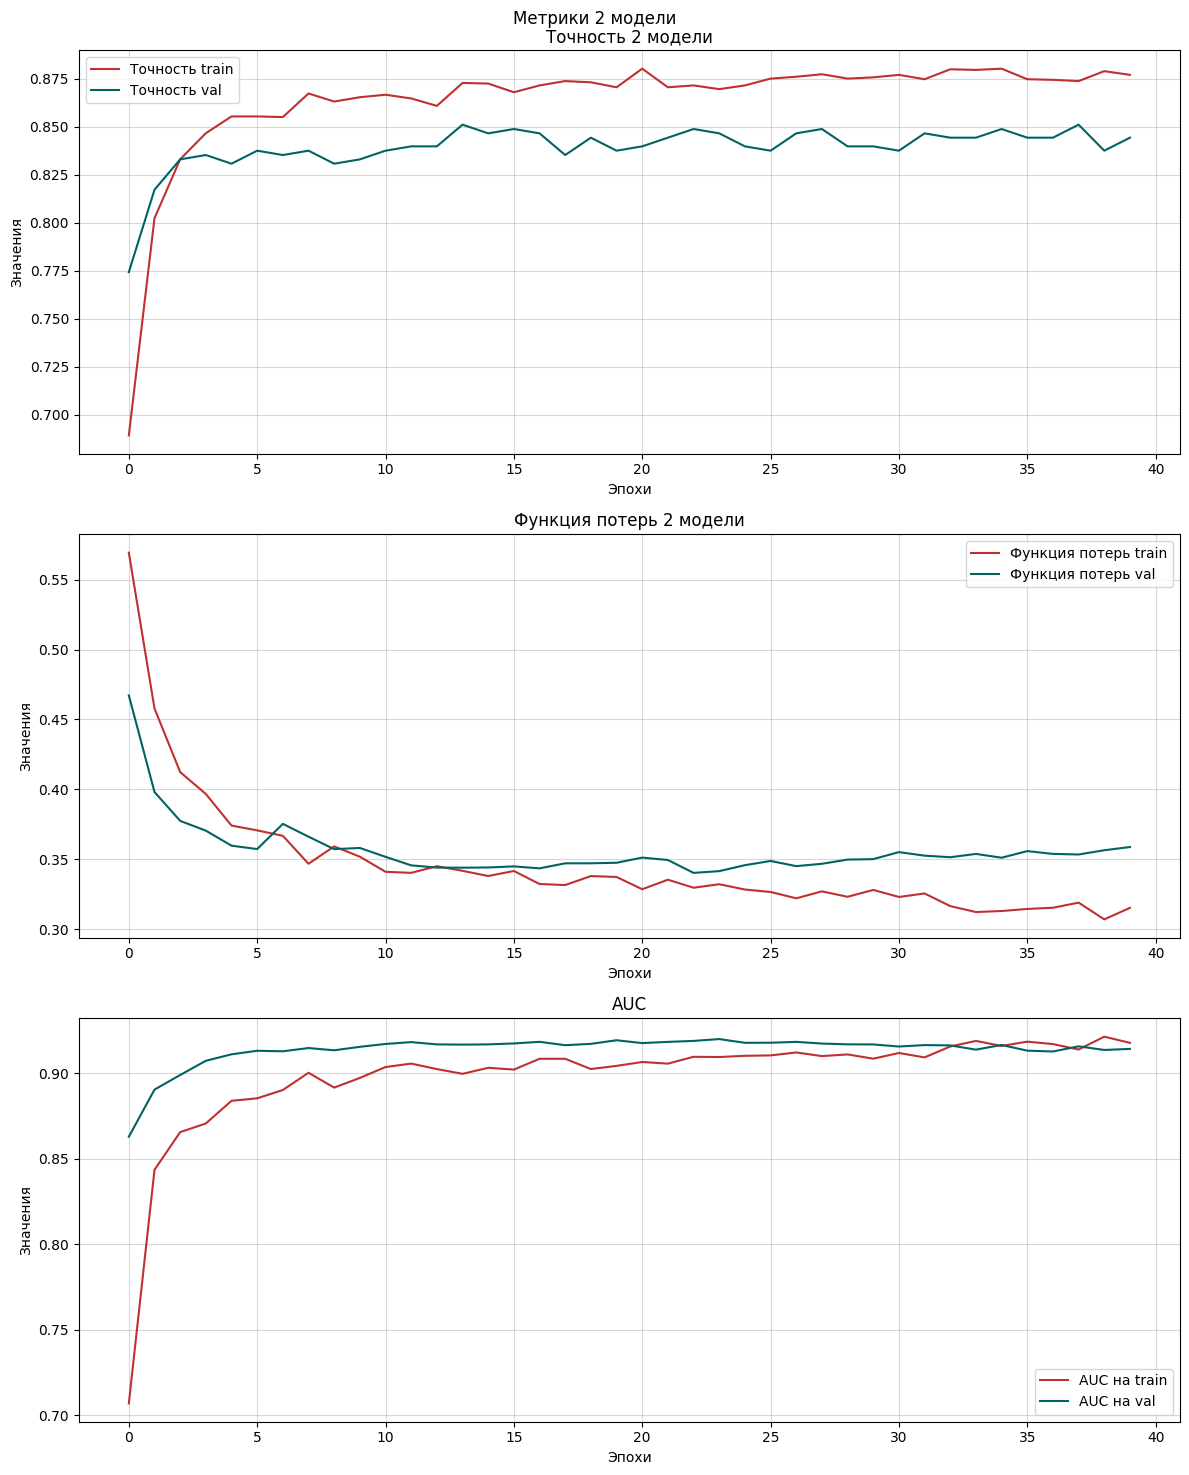

In [25]:
show_metrics(history_2, 2)

#### Модель 3

In [26]:
model_3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.5909 - accuracy: 0.6722 - auc: 0.6674 - val_loss: 0.5302 - val_accuracy: 0.6998 - val_auc: 0.8493
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7342 - auc: 0.7966 - val_loss: 0.4648 - val_accuracy: 0.7991 - val_auc: 0.8649
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7991 - auc: 0.8325 - val_loss: 0.4270 - val_accuracy: 0.8262 - val_auc: 0.8787
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8249 - auc: 0.8619 - val_loss: 0.3947 - val_accuracy: 0.8330 - val_auc: 0.8890
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8388 - auc: 0.8618 - val_loss: 0.3973 - val_accuracy: 0.8284 - val_auc: 0.8944
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8411 - auc: 0.8653 - val_loss: 0.3844 - val_acc

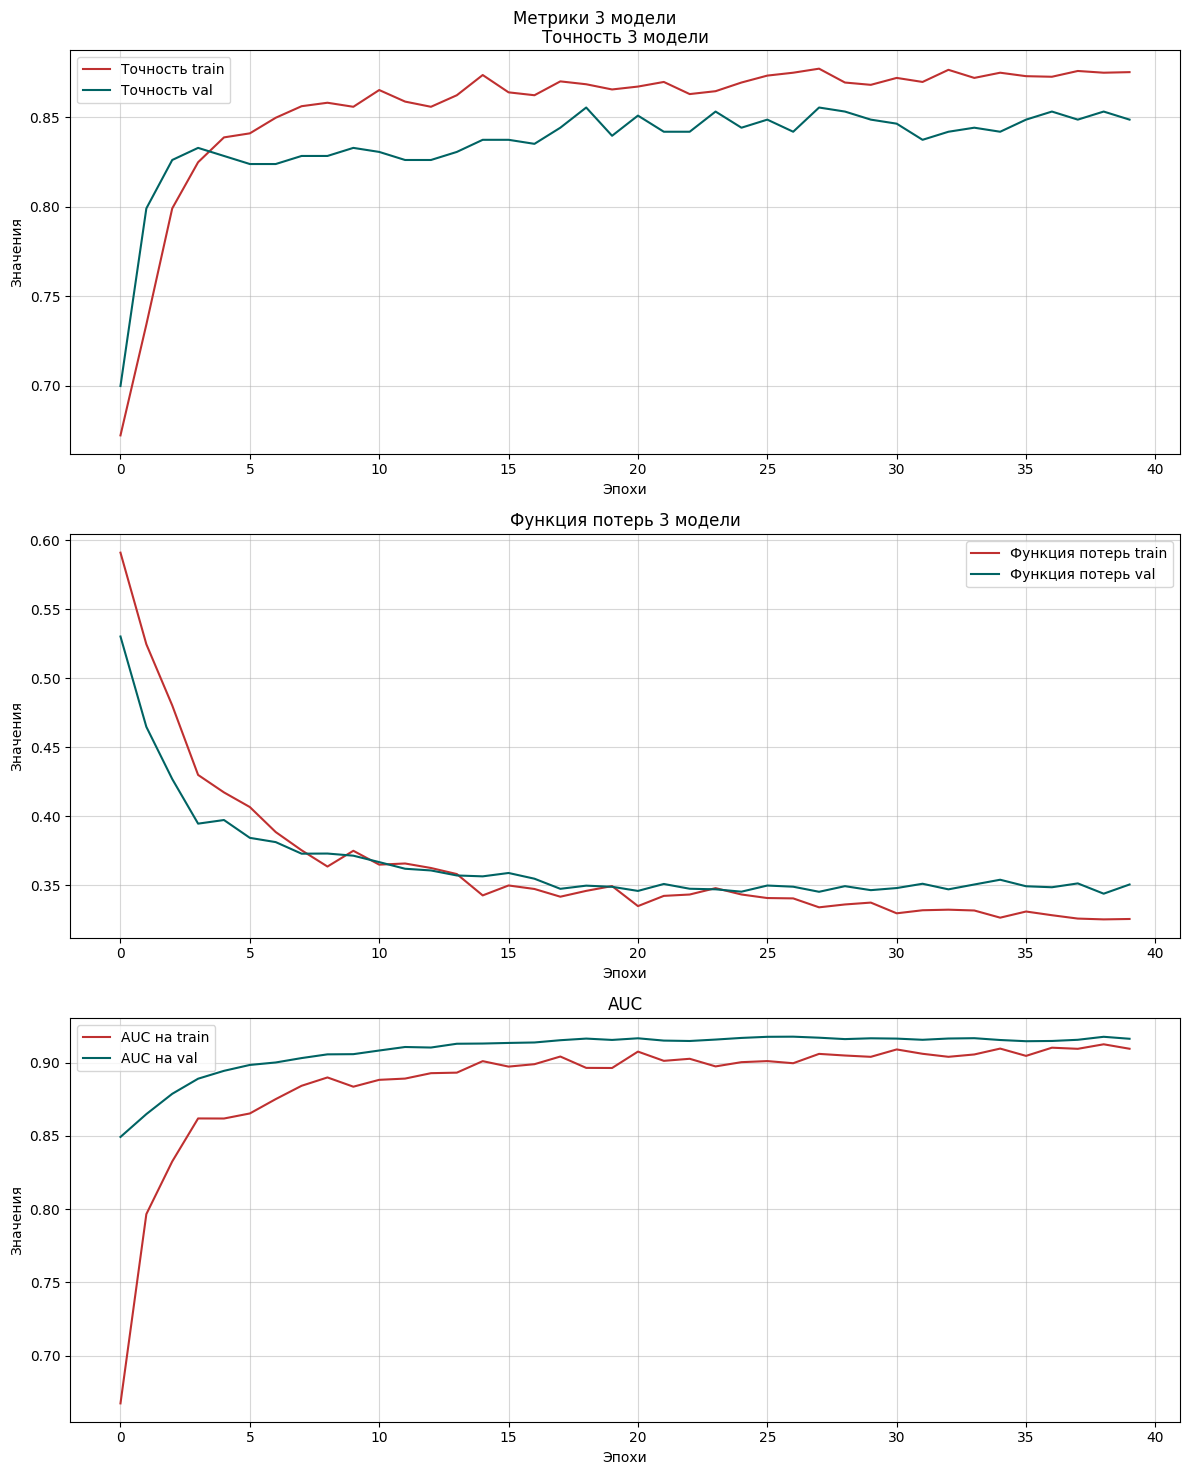

In [27]:
show_metrics(history_3, 3)

### Оптимизация модели

In [28]:
# Метрики для простой модификации
model_metrics = ['accuracy', keras.metrics.AUC(name='auc')]

In [29]:
'''
Функция для отрисовки сравнения метрик двух моделей
Принимает history1 для первоначальной версии и history2 для модифицированной
'''
def plot_3_metrics(history1, history2):
    plt.figure(figsize=(12,10))
    # Заголовок всего холста
    plt.suptitle('Сравнение моделей')
    
    plt.subplot(3,2,1) # расположение: 3 строки, 2 столбца, 1 ячейка
    # Построение линейных графиков для метрик: 
    plt.plot(history1.history['accuracy'], color='#BF3030', label='Точность train')
    plt.plot(history1.history['val_accuracy'], color='#006363', label='Точность val')
    # Заголовок конкретного графика
    plt.title('Изначальная')
    # Подписи осей
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    # Сетка (полупрозрачная)
    plt.grid(alpha=0.5)
    # Легенда графика
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.plot(history2.history['accuracy'], color='#BF3030', ls='--', label='Точность train')
    plt.plot(history2.history['val_accuracy'], color='#006363', ls='--', label='Точность val')
    plt.title('Обновленная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,3)
    plt.plot(history1.history['loss'], color='#BF3030', label='Функция потерь train')
    plt.plot(history1.history['val_loss'], color='#006363', label='Функция потерь val')
    plt.title('Изначальная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,4)
    plt.plot(history2.history['loss'], color='#BF3030', ls='--', label='Функция потерь train')
    plt.plot(history2.history['val_loss'], color='#006363', ls='--', label='Функция потерь val')
    plt.title('Обновленная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,5)
    plt.plot(history1.history['auc'], color='#BF3030', label='AUC на train')
    plt.plot(history1.history['val_auc'], color='#006363', label='AUC на val')
    plt.title('Изначальная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,6)
    plt.plot(history2.history['auc'], color='#BF3030', ls='--', label='AUC на train')
    plt.plot(history2.history['val_auc'], color='#006363', ls='--', label='AUC на val')
    plt.title('Обновленная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [30]:
# Регуляризация L2: 0.001, batch_size=64, 40 эпох 
model_a = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_a.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)

start_time = time.time()
history_a = model_a.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=64,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
49/49 [==============================] - 1s 7ms/step - loss: 0.6673 - accuracy: 0.6783 - auc: 0.6542 - val_loss: 0.6070 - val_accuracy: 0.6795 - val_auc: 0.8589
Epoch 2/40
49/49 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7361 - auc: 0.7989 - val_loss: 0.5073 - val_accuracy: 0.7878 - val_auc: 0.8762
Epoch 3/40
49/49 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7936 - auc: 0.8224 - val_loss: 0.4755 - val_accuracy: 0.8126 - val_auc: 0.8815
Epoch 4/40
49/49 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.8117 - auc: 0.8405 - val_loss: 0.4574 - val_accuracy: 0.8172 - val_auc: 0.8884
Epoch 5/40
49/49 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.8230 - auc: 0.8598 - val_loss: 0.4462 - val_accuracy: 0.8172 - val_auc: 0.8946
Epoch 6/40
49/49 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.8463 - auc: 0.8610 - val_loss: 0.4394 - val_acc

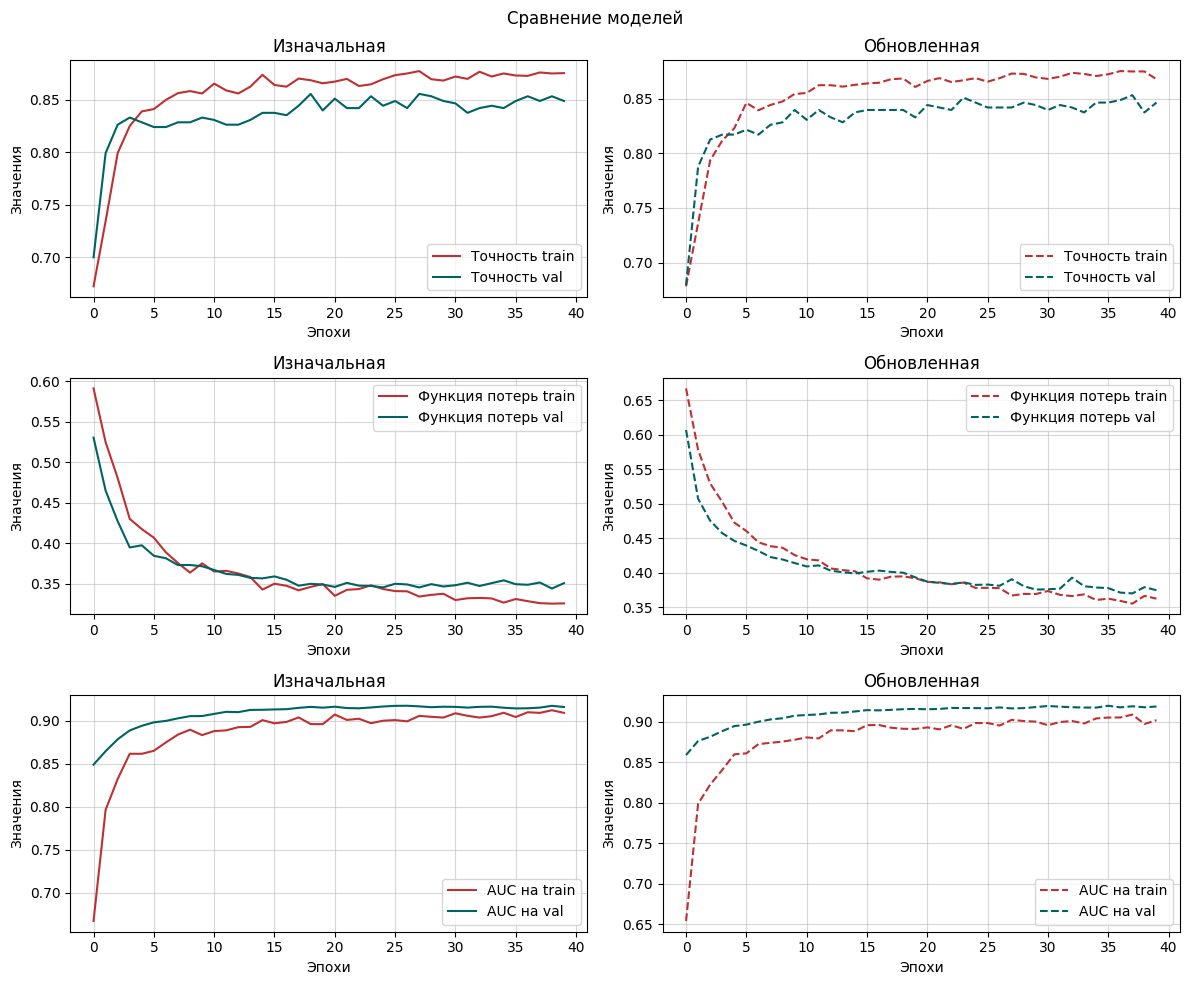

In [31]:
plot_3_metrics(history_3, history_a)

In [30]:
# Регуляризация L2: 0.0001, batch_size=32, 40 эпох 
model_b = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_b.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_b = model_b.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 4ms/step - loss: 0.6146 - accuracy: 0.6683 - auc: 0.6229 - val_loss: 0.5398 - val_accuracy: 0.7020 - val_auc: 0.8610
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7765 - auc: 0.8045 - val_loss: 0.4409 - val_accuracy: 0.8014 - val_auc: 0.8797
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8194 - auc: 0.8471 - val_loss: 0.4099 - val_accuracy: 0.8262 - val_auc: 0.8910
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8375 - auc: 0.8652 - val_loss: 0.3926 - val_accuracy: 0.8262 - val_auc: 0.8983
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8475 - auc: 0.8757 - val_loss: 0.3854 - val_accuracy: 0.8284 - val_auc: 0.9002
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8501 - auc: 0.8724 - val_loss: 0.3836 - val_acc

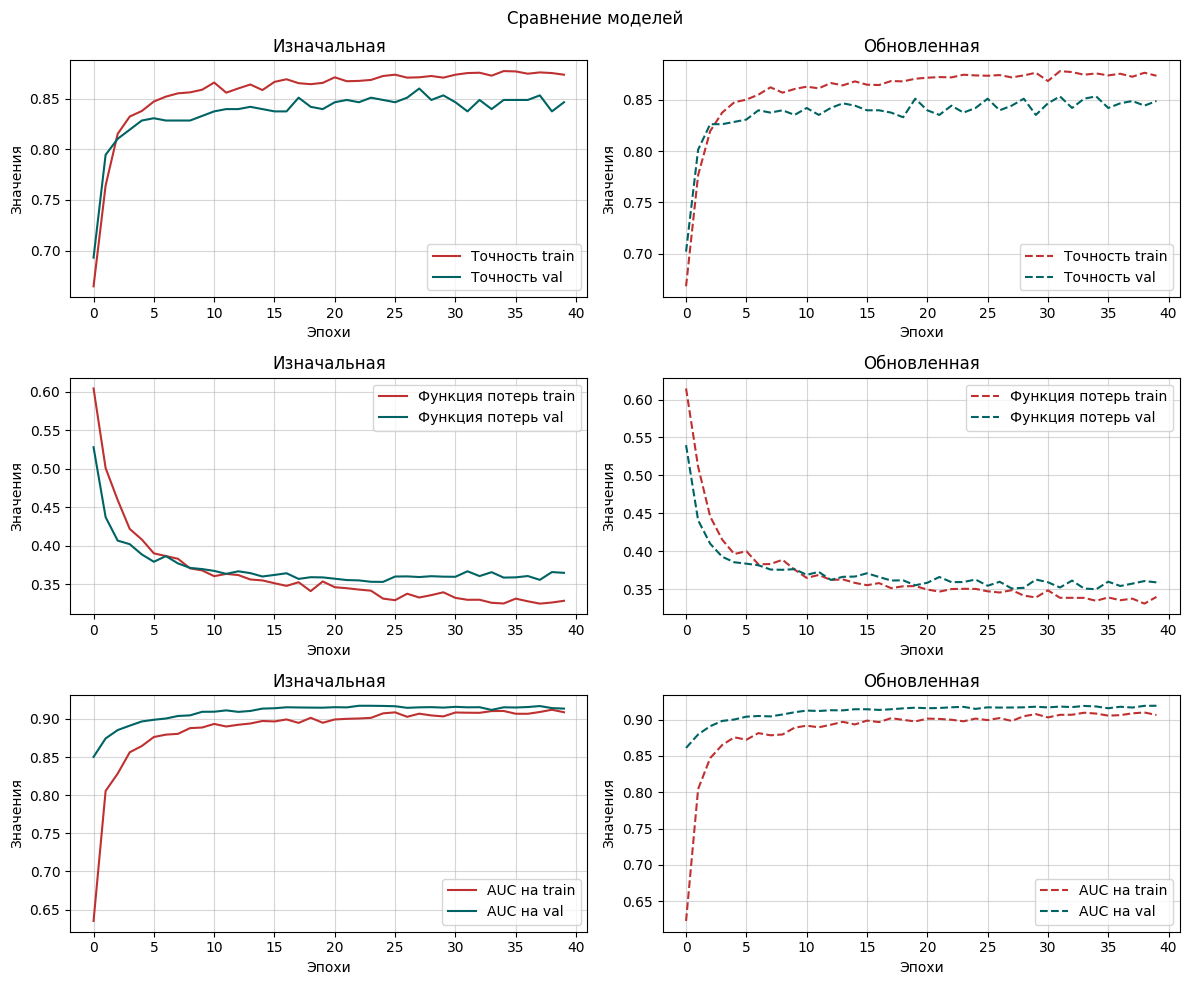

In [31]:
plot_3_metrics(history_3, history_b)

In [32]:
# Регуляризация L2: 0.0001, batch_size=16, 50 эпох 
model_c = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_c.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_c = model_c.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=16,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/50
194/194 [==============================] - 2s 3ms/step - loss: 0.5679 - accuracy: 0.7125 - auc: 0.7208 - val_loss: 0.4518 - val_accuracy: 0.8014 - val_auc: 0.8663
Epoch 2/50
194/194 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8127 - auc: 0.8300 - val_loss: 0.4155 - val_accuracy: 0.8149 - val_auc: 0.8828
Epoch 3/50
194/194 [==============================] - 1s 3ms/step - loss: 0.4380 - accuracy: 0.8330 - auc: 0.8541 - val_loss: 0.4086 - val_accuracy: 0.8284 - val_auc: 0.8925
Epoch 4/50
194/194 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8450 - auc: 0.8626 - val_loss: 0.3943 - val_accuracy: 0.8194 - val_auc: 0.8988
Epoch 5/50
194/194 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8540 - auc: 0.8814 - val_loss: 0.3841 - val_accuracy: 0.8307 - val_auc: 0.9029
Epoch 6/50
194/194 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8501 - auc: 0.8813 - val_loss: 0.37

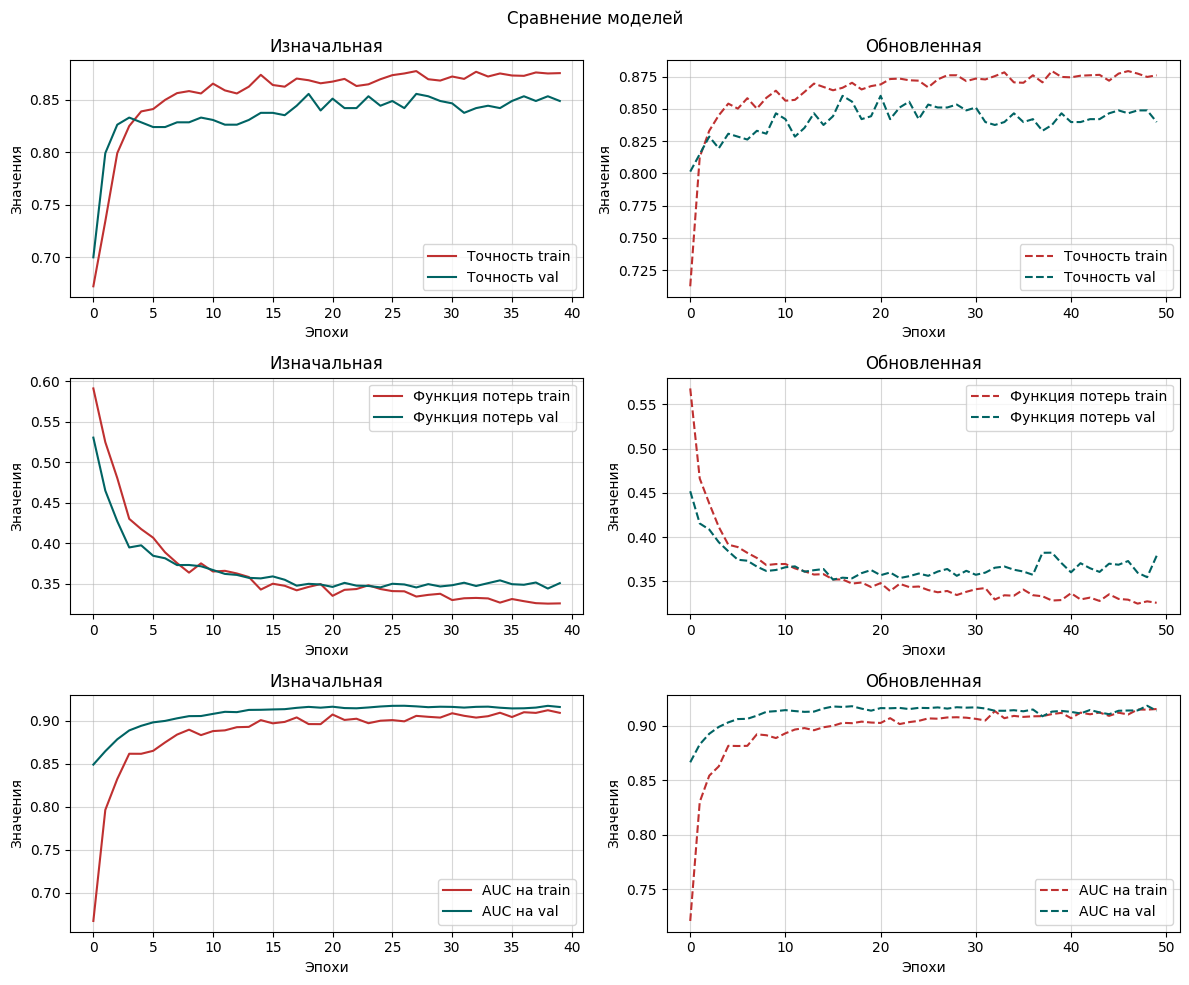

In [33]:
plot_3_metrics(history_3, history_c)

In [34]:
# Регуляризация L2: 0.0001, batch_size=20, 50 эпох 
model_d = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_d.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)

start_time = time.time()
history = model_d.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=20,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/50
155/155 [==============================] - 1s 3ms/step - loss: 0.5955 - accuracy: 0.6964 - auc: 0.7124 - val_loss: 0.4882 - val_accuracy: 0.7720 - val_auc: 0.8778
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.7955 - auc: 0.8346 - val_loss: 0.4072 - val_accuracy: 0.8194 - val_auc: 0.8892
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8275 - auc: 0.8618 - val_loss: 0.4017 - val_accuracy: 0.8217 - val_auc: 0.8955
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8450 - auc: 0.8751 - val_loss: 0.3867 - val_accuracy: 0.8172 - val_auc: 0.8999
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8450 - auc: 0.8768 - val_loss: 0.3833 - val_accuracy: 0.8262 - val_auc: 0.9045
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8450 - auc: 0.8746 - val_loss: 0.37

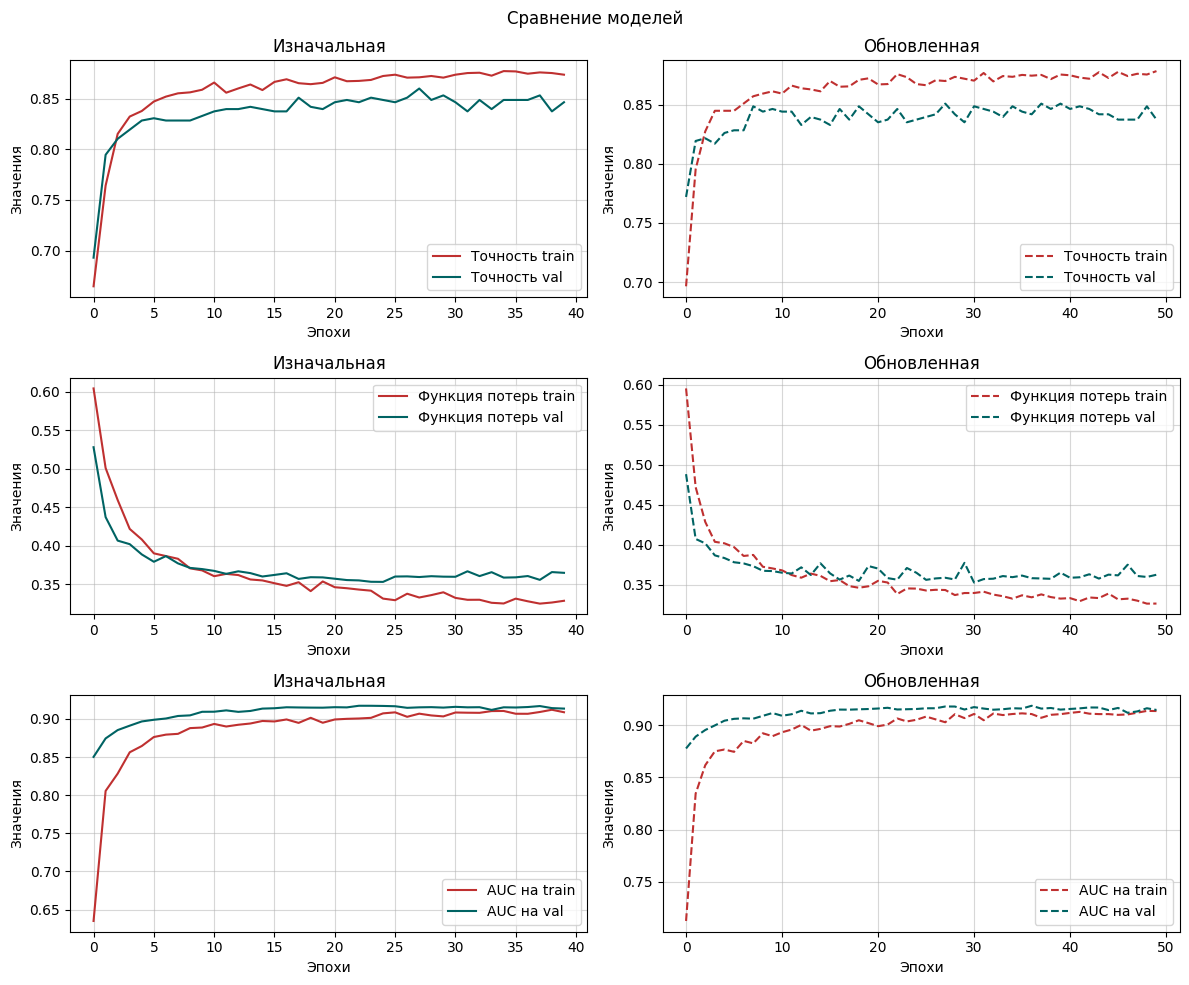

In [35]:
plot_3_metrics(history_3, history)

In [34]:
# Остановка обучения при достижении плато по метрике AUC
callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=5)

In [35]:
# Регуляризация L2: 0.0001, batch_size=20, 50 эпох, ранняя остановка
model_e = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Добавление ранней остановки
callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=5)

model_e.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)

start_time = time.time()
history_e = model_e.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,
                      batch_size=20, callbacks=[callback], verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/50
155/155 [==============================] - 2s 4ms/step - loss: 0.6308 - accuracy: 0.6324 - auc: 0.6597 - val_loss: 0.5318 - val_accuracy: 0.7043 - val_auc: 0.8451
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7829 - auc: 0.8162 - val_loss: 0.4418 - val_accuracy: 0.7991 - val_auc: 0.8769
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8291 - auc: 0.8606 - val_loss: 0.4073 - val_accuracy: 0.8217 - val_auc: 0.8902
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8379 - auc: 0.8540 - val_loss: 0.4036 - val_accuracy: 0.8284 - val_auc: 0.8979
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8443 - auc: 0.8715 - val_loss: 0.3882 - val_accuracy: 0.8330 - val_auc: 0.9006
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8517 - auc: 0.8807 - val_loss: 0.38

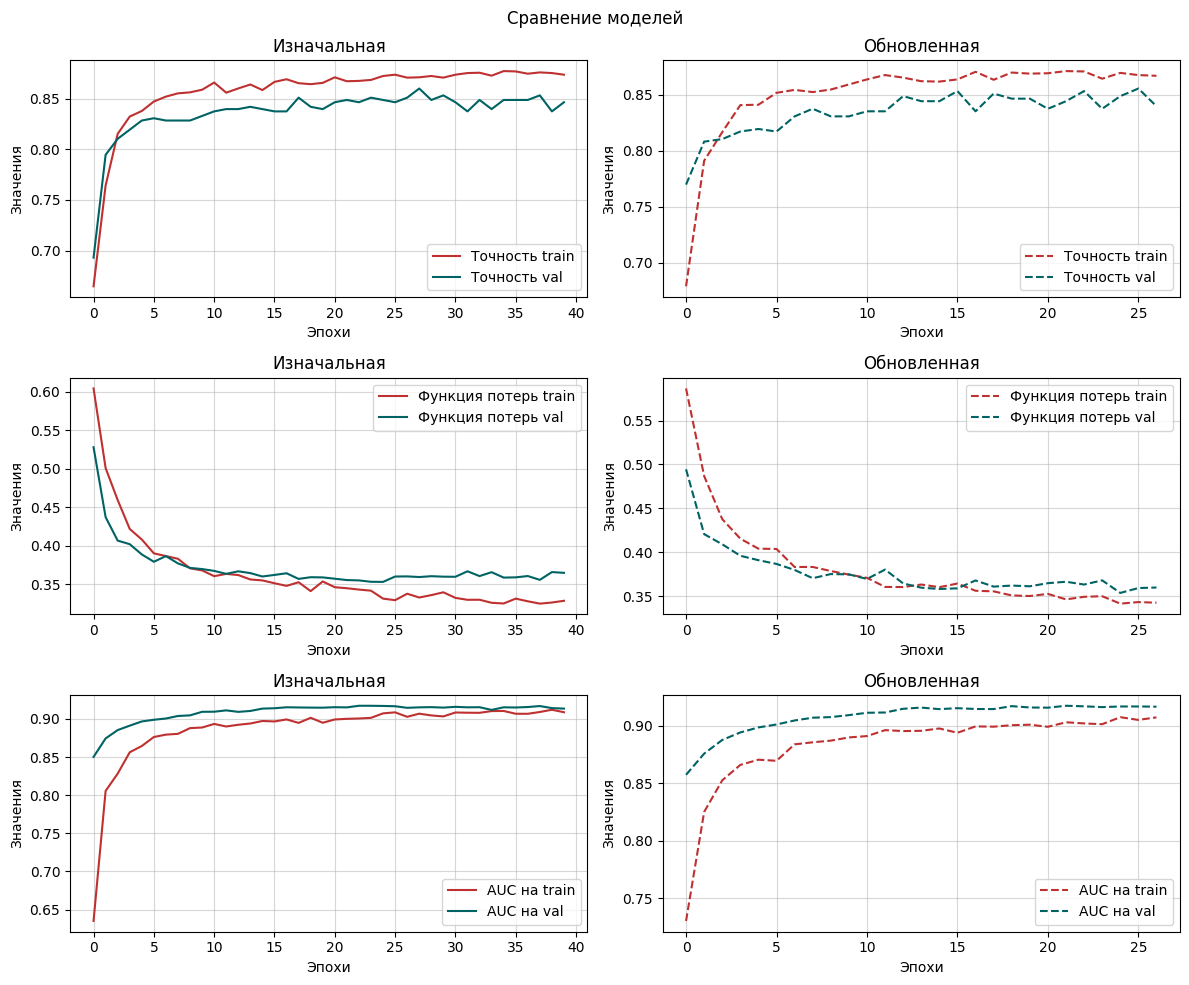

In [38]:
plot_3_metrics(history_3, history_e)

Проверка устойчивости модели

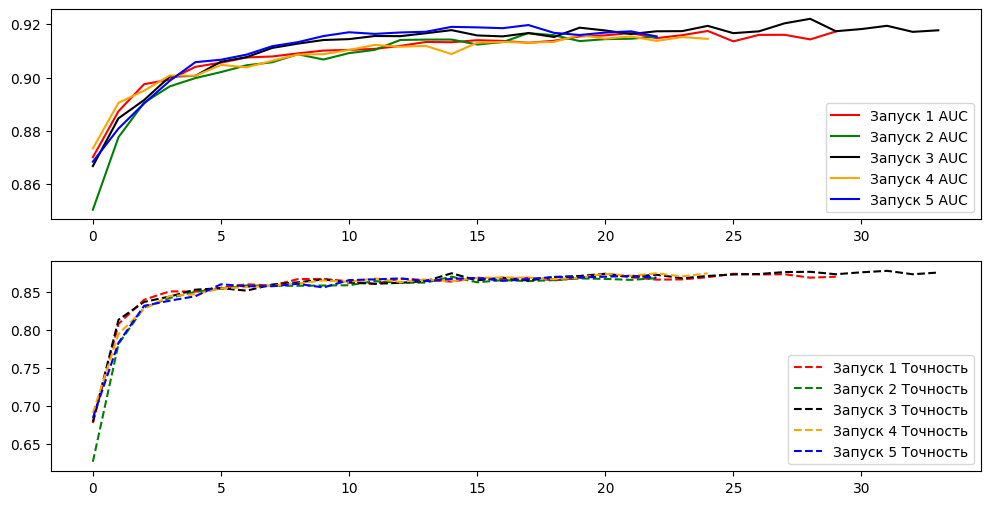

In [36]:
# Функция создания модели (каждая проверка - чистая модель)
def create_model():
    # Архитектура проверяемой модели
    model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
    # Компиляция проверяемой модели
    model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)
    return model

# Список цветов для отображения на графике
colors=['red', 'green', 'black', 'orange', 'blue']
plt.figure(figsize=(12, 6))

# Пять запусков модели
for i in range(5):
    # Создание модели
    model = create_model()
    # Обучение модели
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,
                      batch_size=20, callbacks=[callback], verbose=0)
    # Первый график для accuracy
    plt.subplot(2,1,1)
    plt.plot(history.history['val_auc'], color=colors[i], label=f'Запуск {i+1} AUC')
    # Второй график для AUC
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'], color=colors[i], ls='--', label=f'Запуск {i+1} Точность')

# Вывод и добавление легенд для графиков
plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()

### Проверка финальной модели на тестовом наборе данных

In [37]:
# Итоговая модель: тест на тестовых данных
model_final = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=model_metrics)

history_final = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                      batch_size=20, callbacks=[callback], verbose=1)

Epoch 1/50
155/155 [==============================] - 2s 4ms/step - loss: 0.6038 - accuracy: 0.6663 - auc: 0.7152 - val_loss: 0.4173 - val_accuracy: 0.8311 - val_auc: 0.8980
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8104 - auc: 0.8372 - val_loss: 0.3693 - val_accuracy: 0.8522 - val_auc: 0.9063
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8375 - auc: 0.8608 - val_loss: 0.3516 - val_accuracy: 0.8627 - val_auc: 0.9150
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8398 - auc: 0.8707 - val_loss: 0.3374 - val_accuracy: 0.8673 - val_auc: 0.9188
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8453 - auc: 0.8819 - val_loss: 0.3335 - val_accuracy: 0.8688 - val_auc: 0.9194
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8530 - auc: 0.8838 - val_loss: 0.33

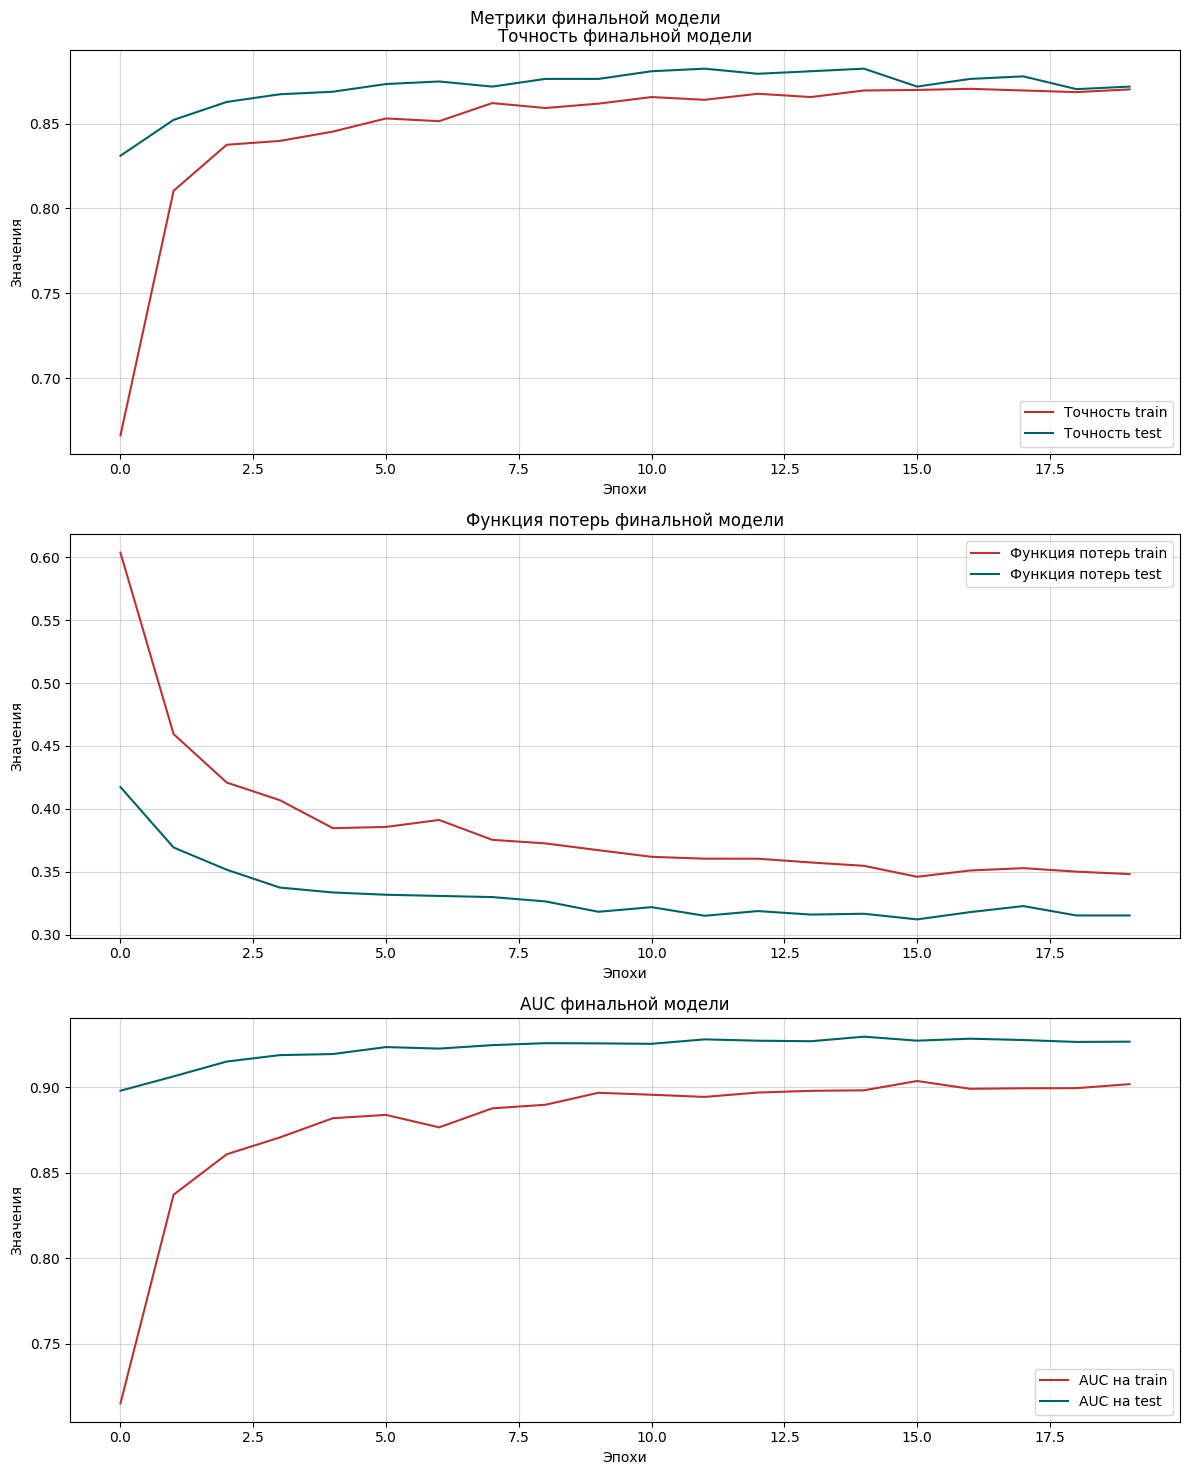

In [38]:
# Вывод метрик модели на тестовых данных
plt.figure(figsize=(12,15))
plt.suptitle('Метрики финальной модели')

plt.subplot(3,1,1)
plt.plot(history_final.history['accuracy'], color='#BF3030', label='Точность train')
plt.plot(history_final.history['val_accuracy'], color='#006363', label='Точность test')
plt.title('Точность финальной модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_final.history['loss'], color='#BF3030', label='Функция потерь train')
plt.plot(history_final.history['val_loss'], color='#006363', label='Функция потерь test')
plt.title('Функция потерь финальной модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_final.history['auc'], color='#BF3030', label='AUC на train')
plt.plot(history_final.history['val_auc'], color='#006363', label='AUC на test')
plt.title('AUC финальной модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

Сохранение модели

In [39]:
model_final.save('../model.keras')